## DSCI 100 Group 11 Project ## 

Authors: Ishita Sharma (66518101), Eric Haung, Yunfeng Bu (70556543), Andrew Liu 


### Introduction ###

The objective of this project is to understand user behaviour when playing video games such as MineCraft. By understanding how users interact with the game, researchers can make adjustments that better serve the user. With this information they can also work on strategies to improve recruitment and create better experiences for the user. This will in turn keep users subscribed to the game for longer. The University of British Columbia’s Computer Science research team is using MineCraft to collect real-world data from users playing the game. For this project, we will be working on answering which kinds of players are most likely to contribute a large amount of data. The goal is to develop a model that can identify which players are most likely to engage heavily with the MineCraft server

We will be using two datasets for this project, which we will combine into one dataset. The first one is the Players dataset which provides the following information; name, gender, age, experience level, subscription status, hashed email of user, number of played hours, player ID, and an organization name. The second dataset is the Sessions dataset which provides the following information; the users hashed email, start and end time, and original start and end time. To answer our specific question we will be using a variable that includes the total played hours as a response variable. And then our explanatory variable will include gender, experience, age, subscription status, and played hours. We will be combining the dataset by using a common variable which is the Hashed Email. 

##### Question: #####
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.


In [3]:
library(tidyverse)
library(scales)
library(ggplot2)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [4]:
url1<-"https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
url2<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

In [5]:
session_data <- read_csv(url1)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
players_data<-read_csv(url2)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Methods ### 

To start answering our question, we loaded two datasets; Players and Sessions. We proceeded to wrangle our datasets by cleaning them into tidy format, filtering for necessary variables, and then transforming them into a combined dataset. 

##### Sessions Dataset: 
We converted start_time and end_time into datetime format. And calculated the session durations in minutes. Lastly we pooled the data to compute the total play duration and frequency of sessions for each user. 

##### Players Dataset: 
We removed any unnecessary column such as individualID and organizationName. Then converted categorical variables into factor variables (experience, subscribe, and gender). And lastly filtered out any data points that did not include 

##### Combined Dataset: 
We combined these two datasets by use of the common variable; hashedEmail to understand how demographic factors were correlated to the player engagement. 


##### Classification Model: 
We used the classification model to categorize players based on their engagement levels in terms of played hours. For this model we transformed the played_hours variable into a categorical variable. 
Try (0-1 hrs): Minimal engagement 
Play (1-4 hrs): Moderate engagement 
Enjoy (4+ hrs): High engagement 
The classification model will demonstrate the demographic characteristics that are associated with players in each engagement category. By predicting the likelihood of a player falling into a specific category, the model can pinpoint who to target for recruitment efforts. 

##### Regression Model: 
We also used the regression model to predict the exact amount of played hours a user might contribute to based on demographic characteristics. This model can output a continuous prediction of played hours, allowing for a precise measurement of how long a player is engaging with the game. It can also help quantify the impact of explanatory variables on the played hours. 


In [7]:
#Data Wrangling:

In [8]:

session_data_wrangle<-session_data|>             
                      mutate(start_time=dmy_hm(start_time),
                      end_time=dmy_hm(end_time)
                    )|>
              filter(!is.na(start_time)&!is.na(end_time))|>
              mutate(Duration=as.numeric(end_time-start_time,unit="mins")
                    )|>
              group_by(hashedEmail)|>
              mutate(frequency = n(),
                     total_duration=sum(Duration,na.rm=TRUE)
                    ) |>
              ungroup()

players_data_wrangle<-players_data|>
                      select(-individualId,-organizationName)|>
                      mutate(experience = as.factor(experience),
                             subscribe = as.factor(subscribe),
                             gender = as.factor(gender))|>
                      filter(!is.na(experience) & !is.na(played_hours) & !is.na(age))



combined_data <- session_data_wrangle|>
  left_join(players_data_wrangle, by = "hashedEmail")



  
combined_data_1<-combined_data|>
               distinct(hashedEmail,start_time,.keep_all = TRUE)|>
               select(played_hours, name, gender, age,Duration,frequency, total_duration, experience, subscribe)|>
               distinct(name,.keep_all = TRUE)|>
               filter(age>=15&age<=30)|>
               select(-subscribe,-total_duration)


combined_data_1

played_hours,name,gender,age,Duration,frequency,experience
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>,<fct>
223.1,Hiroshi,Male,17,12,219,Regular
53.9,Alex,Male,17,13,130,Amateur
150.0,Delara,Female,16,23,159,Amateur
56.1,Dana,Male,23,9,310,Amateur
178.2,Piper,Female,19,17,147,Regular
2.0,Ibrahim,Prefer not to say,27,18,8,Beginner
218.1,Akio,Non-binary,20,144,94,Regular
32.0,Sidney,Male,22,10,79,Amateur
1.4,Aiden,Prefer not to say,25,11,6,Veteran


In [9]:
analysis_plot_1<-combined_data_1|>
               ggplot(aes(x=total_duration,y=experience,fill = experience))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the Total Play time and Player Experience",
                   y="Experience",
                   x="Total player time(minutes)"
               )+
               theme(text=element_text(size=12))
analysis_plot_1

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'total_duration' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_h

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”


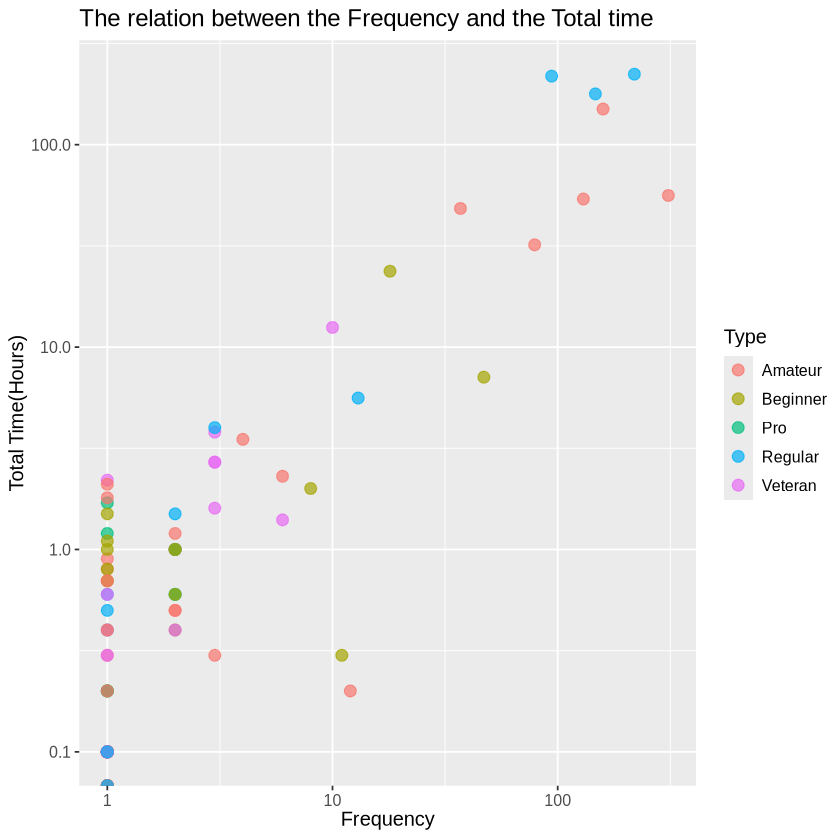

In [10]:

analysis_plot_2<-combined_data_1|>
               ggplot(aes(x=frequency,y=played_hours,colour = experience))+
               geom_point(size = 3, alpha = 0.7)+
               labs(
                   title="The relation between the Frequency and the Total time",
                   x="Frequency",
                   y="Total Time(Hours)",
                   colour="Type"
               )+
               scale_x_log10(labels=comma)+
               scale_y_log10(labels=comma)+
               theme(text=element_text(size=12))
analysis_plot_2

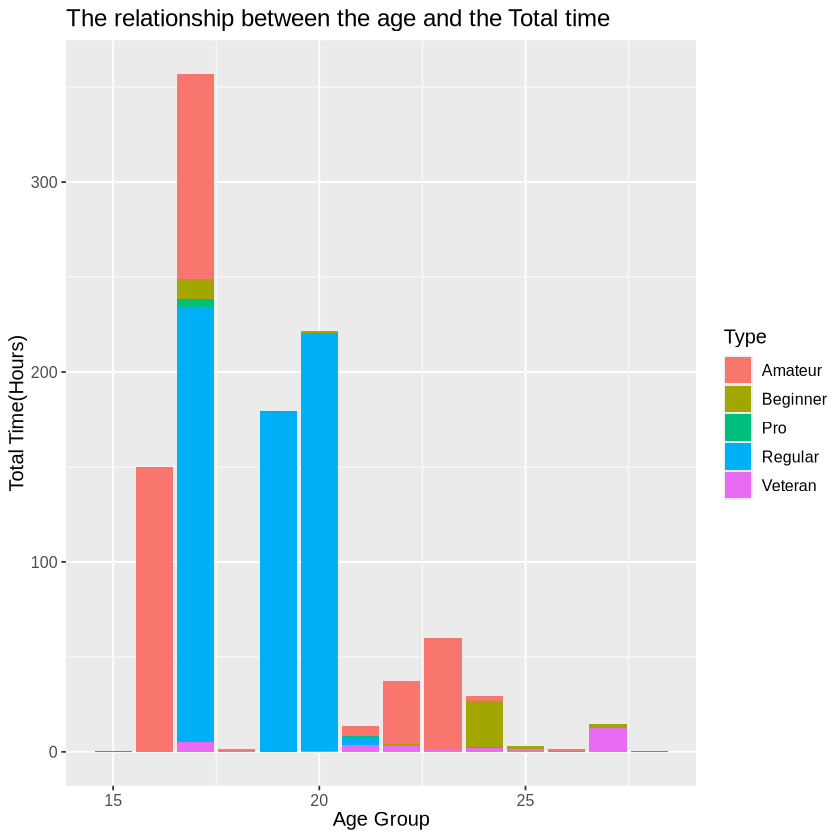

In [15]:
analysis_plot_3<-combined_data_1|>
               ggplot(aes(x=age,y=played_hours,fill = experience))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the age and the Total time",
                   x="Age Group",
                   y="Total Time(Hours)",
                   fill="Type"
               )+
               theme(text=element_text(size=12))
analysis_plot_3